## Challenge 1

In [1]:
import csv
import string
from collections import defaultdict, OrderedDict

path = 'turnstile_160326.csv'
path2 = 'turnstile_160319.csv'
data = []
data2 = []
headers = []

with open(path, 'rb') as infile:
    reader = csv.reader(infile)
    data =  [[cell.strip() for cell in row] for row in reader] #loop over rows/cells to remove extra spaces
with open(path2, 'rb') as infile2:
    reader2 = csv.reader(infile2)
    data2 = [[cell.strip() for cell in row] for row in reader2] #loop over rows/cells to remove extra spaces
headers = data.pop(0) #pops off headers into new list
data2.pop(0) #pop off headers from 2nd file
data.extend(data2) #appends data2 to end of data

In [58]:
d = {} #initialize dict
for i in range(len(data)):
    #creates new key unless already exists, then adds values list to key values
    d.setdefault(tuple(data[i][0:4]), []).append(data[i][4:])

## Challenge 2

In [60]:
# New values lists only include 'point in time' and 'count of entries'
import dateutil.parser
import datetime

d2 = {}
values = [] #intialize new list for new values lists
for i in range(len(data)):
    values.append(dateutil.parser.parse(str(data[i][6]) + ' ' + str(data[i][7]))) #appends datetime object to values
    values.append(int(data[i][9])) #appends entries data to values
    #creates new key unless already exists, then adds values list to key values
    d2.setdefault(tuple(data[i][0:4]), []).append(values)
    values = [] #empties values list before repeating loop

## Challenge 3

In [4]:
# for each datetime where datetime(Y, m, d) are the same
# subtract the entries for the max(datetime) - min(datetime)

d3 = {} #initialize dict for dealing with cumulative entries issue
values3 = []
keys = list(d2.viewkeys()) #creates a list of d2 keys
for i in range(len(keys)): #loops thru each d2 key
    for j in range(len(d2[keys[i]])): #loops thru rows of values in key for d2
        if j == 0: #for first row in each key-values list
            values3.append(d2[keys[i]][j][0]) #append datetime
            values3.append(0) #append entries (starts at zero for first entry)
            d3.setdefault(keys[i], []).append(values3) #append values to d3
            values3 = []
        else: #for all subsequent rows
            values3.append(d2[keys[i]][j][0]) #append datetime
            #append total entries during timeperiod by subtracting entries(current row) - entries(previous row)
            if 0 <= d2[keys[i]][j][1] - d2[keys[i]][j-1][1] < 10000: #make sure entries count is w/in reason
                values3.append(d2[keys[i]][j][1] - d2[keys[i]][j-1][1])
            else: #if entries count unreasonable >> set to 0
                values3.append(0)
            d3.setdefault(keys[i], []).append(values3) #append values to d3
            values3 = []

In [14]:
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

In [64]:
keys3 = list(d3.viewkeys()) #creates list of d3 keys
d4 = {}
d_final = {}
d4_list = []
for i in range(len(keys3)): #loops thru each key in d3
    for j in range(len(d3[keys3[i]])): #loops thru each row in d3 keys
        #if datetime.date() NOT in d4 keys, then add key + entries as value
        if d3[keys3[i]][j][0].date() not in d4:
            d4.setdefault(d3[keys3[i]][j][0].date(), [])
            d4[d3[keys3[i]][j][0].date()] = d3[keys3[i]][j][1]
        else: #else if datetime.date() IS in d4 keys, then add entries to existing entries value
            d4[d3[keys3[i]][j][0].date()] += d3[keys3[i]][j][1]
    for key, value in d4.viewitems():
        inner_list = [key, value]
        d_final.setdefault(keys3[i], []).append(inner_list)
    #pprint.pprint(d_final)
    d4 = {}
for i in range(len(keys3)):
    d_final[keys3[i]].sort()

In [73]:
print d_final[keys3[1]]
print keys3[1]

[[datetime.date(2016, 3, 12), 368], [datetime.date(2016, 3, 13), 303], [datetime.date(2016, 3, 14), 689], [datetime.date(2016, 3, 15), 758], [datetime.date(2016, 3, 16), 715], [datetime.date(2016, 3, 17), 747], [datetime.date(2016, 3, 18), 678], [datetime.date(2016, 3, 19), 399], [datetime.date(2016, 3, 20), 321], [datetime.date(2016, 3, 21), 662], [datetime.date(2016, 3, 22), 652], [datetime.date(2016, 3, 23), 680], [datetime.date(2016, 3, 24), 702], [datetime.date(2016, 3, 25), 563]]
('R190', 'R038', '00-00-02', '215 ST')


In [165]:
d_df = defaultdict(list)
date_strings = [t.strftime('%m/%d/%Y') for t in list(zip(*d_final.values()[0])[0])]
columns = ['C/A','UNIT','SCP','STATION'] + date_strings
for k,v in d_final.items():
    d_df[k]=zip(*v)[1]
    
d_df2 = [list(k)+list(v) for k,v in d_df.items()]
print columns

['C/A', 'UNIT', 'SCP', 'STATION', '03/12/2016', '03/13/2016', '03/14/2016', '03/15/2016', '03/16/2016', '03/17/2016', '03/18/2016', '03/19/2016', '03/20/2016', '03/21/2016', '03/22/2016', '03/23/2016', '03/24/2016', '03/25/2016']


In [166]:
import pandas as pd

#df = pd.DataFrame.from_dict(dict([(k, pd.Series(v)) for k,v in d_final.iteritems()]), orient='index') #DF for arrays of diff length
df = pd.DataFrame(d_df2)
df.columns = columns
df.head()

,C/A,UNIT,SCP,STATION,03/12/2016,03/13/2016,03/14/2016,03/15/2016,03/16/2016,03/17/2016,03/18/2016,03/19/2016,03/20/2016,03/21/2016,03/22/2016,03/23/2016,03/24/2016,03/25/2016
0,N134,R385,00-00-00,ROCKAWAY BLVD,694,646.0,1399.0,1517.0,1579.0,1552.0,1489.0,722.0,577.0,1430.0,1544.0,1500.0,1539.0,1180.0
1,R190,R038,00-00-02,215 ST,368,303.0,689.0,758.0,715.0,747.0,678.0,399.0,321.0,662.0,652.0,680.0,702.0,563.0
2,PTH08,R540,00-01-06,PATH WTC,210,67.0,376.0,55.0,714.0,699.0,617.0,126.0,108.0,766.0,685.0,684.0,700.0,542.0
3,H016,R250,00-00-02,GRAND ST,168,136.0,323.0,370.0,393.0,412.0,365.0,170.0,148.0,356.0,387.0,367.0,342.0,258.0
4,A069,R044,01-00-02,CHAMBERS ST,384,264.0,1096.0,1257.0,1319.0,1183.0,1222.0,353.0,278.0,1161.0,1229.0,1299.0,1254.0,921.0


## Challenge 4

In [ ]:
# Plot daily time series for a turnstile

In [189]:
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
turnstile = d_final[keys3[0]] #create list of lists for one turnstile
turnstile.sort() #sorts data by dates (b/c first element of each inner-list)
dates = [] #initialize
counts = [] #initialize
for i in turnstile: #loops over turnstile
    dates.append(i[0]) #appends date to dates list
    counts.append(i[1]) #appends counts to counts list
dates.sort()
pprint.pprint(dates)
pprint.pprint(counts)

[datetime.date(2016, 3, 12),
 datetime.date(2016, 3, 13),
 datetime.date(2016, 3, 14),
 datetime.date(2016, 3, 15),
 datetime.date(2016, 3, 16),
 datetime.date(2016, 3, 17),
 datetime.date(2016, 3, 18),
 datetime.date(2016, 3, 19),
 datetime.date(2016, 3, 20),
 datetime.date(2016, 3, 21),
 datetime.date(2016, 3, 22),
 datetime.date(2016, 3, 23),
 datetime.date(2016, 3, 24),
 datetime.date(2016, 3, 25)]
[694,
 646,
 1399,
 1517,
 1579,
 1552,
 1489,
 722,
 577,
 1430,
 1544,
 1500,
 1539,
 1180]


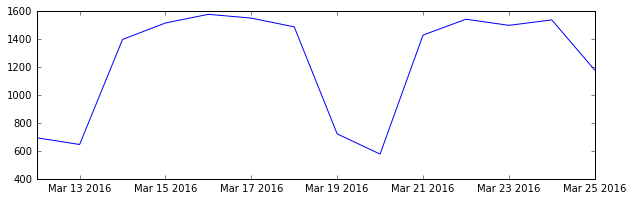

In [49]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)

## Challenge 5

In [123]:
# Combine turnstiles in the same ControlArea/Unit/Station combo.
# >> Same value for the C/A, UNIT and STATION columns, different values for the SCP column.
# For each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [169]:
grouped = df.groupby(['C/A','UNIT','STATION'])

In [174]:
grouped.sum()

,,,03/12/2016,03/13/2016,03/14/2016,03/15/2016,03/16/2016,03/17/2016,03/18/2016,03/19/2016,03/20/2016,03/21/2016,03/22/2016,03/23/2016,03/24/2016,03/25/2016
C/A,UNIT,STATION,,,,,,,,,,,,,,
A002,R051,59 ST,10763,7351.0,15199.0,16742.0,17067.0,17257.0,17296.0,8677.0,8626.0,15436.0,16584.0,16626.0,16655.0,14776.0
A006,R079,5 AV/59 ST,6512,5308.0,11838.0,13189.0,13524.0,14193.0,12754.0,6509.0,5127.0,12421.0,13345.0,13438.0,13473.0,10584.0
A007,R079,5 AV/59 ST,4116,3699.0,3833.0,4521.0,5143.0,6458.0,4762.0,4056.0,3056.0,4488.0,4976.0,5308.0,5379.0,4751.0
A010,R080,57 ST-7 AV,11411,8426.0,15185.0,17853.0,19298.0,19554.0,17952.0,10082.0,11447.0,16166.0,17899.0,18007.0,18684.0,14670.0
A011,R080,57 ST-7 AV,3108,2269.0,5247.0,5831.0,6095.0,6161.0,5931.0,2551.0,3131.0,5208.0,5631.0,5819.0,5870.0,4586.0
A013,R081,49 ST,4053,3692.0,6293.0,6435.0,7244.0,7686.0,7165.0,3376.0,4297.0,6168.0,6538.0,6910.0,6949.0,5567.0
A014,R081,49 ST,2671,1967.0,3574.0,3803.0,4494.0,4356.0,4346.0,2135.0,3067.0,3815.0,3904.0,4204.0,4236.0,3541.0
A015,R081,49 ST,6883,5389.0,9477.0,10766.0,11763.0,12146.0,12159.0,5879.0,6819.0,9920.0,10970.0,11449.0,12225.0,9981.0
A016,R081,49 ST,4179,3193.0,2803.0,7594.0,6311.0,6337.0,6697.0,3622.0,4432.0,5145.0,5592.0,6127.0,6285.0,5287.0


## Challenge 6

In [ ]:
# Combine everything in each station, and come up with a time series
# of [(date1, count1),(date2,count2),...] type of time series for each STATION,
# by adding up all the turnstiles in a station.

In [177]:
station = df.groupby('STATION').sum()
station

,03/12/2016,03/13/2016,03/14/2016,03/15/2016,03/16/2016,03/17/2016,03/18/2016,03/19/2016,03/20/2016,03/21/2016,03/22/2016,03/23/2016,03/24/2016,03/25/2016
STATION,,,,,,,,,,,,,,
1 AV,17542,12724.0,22301.0,23331.0,24622.0,24729.0,26167.0,13649.0,13986.0,22018.0,23910.0,24688.0,25026.0,22459.0
103 ST,17012,15887.0,29023.0,30418.0,30824.0,31099.0,27605.0,17642.0,15957.0,28627.0,21222.0,18330.0,18992.0,16651.0
103 ST-CORONA,8800,5225.0,19220.0,20432.0,20848.0,20767.0,20846.0,12671.0,10548.0,20002.0,20641.0,20856.0,20648.0,16890.0
104 ST,10407,1480.0,4928.0,5256.0,5337.0,5249.0,5093.0,2210.0,1735.0,5031.0,5152.0,5129.0,5138.0,3845.0
110 ST,9389,6153.0,14319.0,15120.0,15697.0,15641.0,15842.0,8368.0,7065.0,14710.0,15293.0,15463.0,15450.0,11857.0
111 ST,9353,6319.0,14034.0,14747.0,14966.0,14968.0,14911.0,9294.0,7582.0,14450.0,14748.0,14934.0,14773.0,12214.0
116 ST,19963,20131.0,35639.0,37865.0,39131.0,38273.0,39161.0,22844.0,21392.0,36369.0,38171.0,38973.0,39067.0,32006.0
116 ST-COLUMBIA,7541,6527.0,12172.0,12459.0,14147.0,14748.0,13486.0,7330.0,6932.0,16011.0,17716.0,18302.0,19196.0,16938.0
121 ST,1626,1171.0,2550.0,2639.0,2619.0,2637.0,2530.0,1489.0,1316.0,2552.0,2547.0,2631.0,2575.0,2205.0


## Challenge 7

In [190]:
# Plot the time series for a station.
plt.style.use('ggplot')

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.]),
 <a list of 8 Text xticklabel objects>)

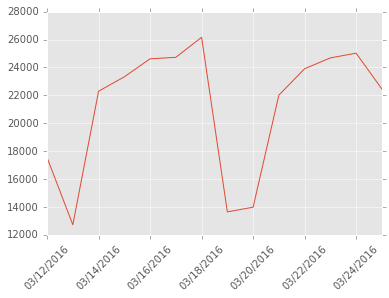

In [192]:
first_ave = station.loc['1 AV']
first_ave.plot()
plt.xticks(rotation=45)

## Challenge 8

In [197]:
week_count_list_1 = list(first_ave[:7])
week_count_list_2 = list(first_ave[7:])
print week_count_list_1
print week_count_list_2

[17542.0, 12724.0, 22301.0, 23331.0, 24622.0, 24729.0, 26167.0]
[13649.0, 13986.0, 22018.0, 23910.0, 24688.0, 25026.0, 22459.0]


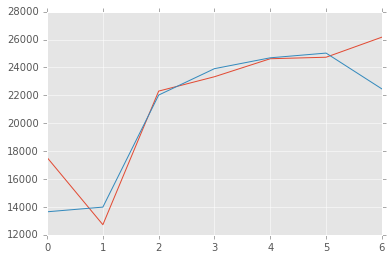

In [199]:
plt.plot(week_count_list_1)
plt.plot(week_count_list_2)

## Challenge 9

In [201]:
station

,03/12/2016,03/13/2016,03/14/2016,03/15/2016,03/16/2016,03/17/2016,03/18/2016,03/19/2016,03/20/2016,03/21/2016,03/22/2016,03/23/2016,03/24/2016,03/25/2016
STATION,,,,,,,,,,,,,,
1 AV,17542,12724.0,22301.0,23331.0,24622.0,24729.0,26167.0,13649.0,13986.0,22018.0,23910.0,24688.0,25026.0,22459.0
103 ST,17012,15887.0,29023.0,30418.0,30824.0,31099.0,27605.0,17642.0,15957.0,28627.0,21222.0,18330.0,18992.0,16651.0
103 ST-CORONA,8800,5225.0,19220.0,20432.0,20848.0,20767.0,20846.0,12671.0,10548.0,20002.0,20641.0,20856.0,20648.0,16890.0
104 ST,10407,1480.0,4928.0,5256.0,5337.0,5249.0,5093.0,2210.0,1735.0,5031.0,5152.0,5129.0,5138.0,3845.0
110 ST,9389,6153.0,14319.0,15120.0,15697.0,15641.0,15842.0,8368.0,7065.0,14710.0,15293.0,15463.0,15450.0,11857.0
111 ST,9353,6319.0,14034.0,14747.0,14966.0,14968.0,14911.0,9294.0,7582.0,14450.0,14748.0,14934.0,14773.0,12214.0
116 ST,19963,20131.0,35639.0,37865.0,39131.0,38273.0,39161.0,22844.0,21392.0,36369.0,38171.0,38973.0,39067.0,32006.0
116 ST-COLUMBIA,7541,6527.0,12172.0,12459.0,14147.0,14748.0,13486.0,7330.0,6932.0,16011.0,17716.0,18302.0,19196.0,16938.0
121 ST,1626,1171.0,2550.0,2639.0,2619.0,2637.0,2530.0,1489.0,1316.0,2552.0,2547.0,2631.0,2575.0,2205.0


In [212]:
station['TOTAL'] = station.sum(axis=1)
station_totals = station['TOTAL']
station_totals.sort_values(ascending=False).head(15)

STATION
34 ST-PENN STA     18521334.0
GRD CNTRL-42 ST    15892452.0
34 ST-HERALD SQ    12968496.0
23 ST              12946941.0
14 ST-UNION SQ     12086226.0
86 ST              11918457.0
TIMES SQ-42 ST     10693791.0
42 ST-PORT AUTH    10277208.0
59 ST               8693082.0
FULTON ST           8597412.0
96 ST               8438301.0
59 ST COLUMBUS      7984818.0
CANAL ST            7966620.0
CHAMBERS ST         7874109.0
125 ST              7701453.0
Name: TOTAL, dtype: float64

## Challenge 10

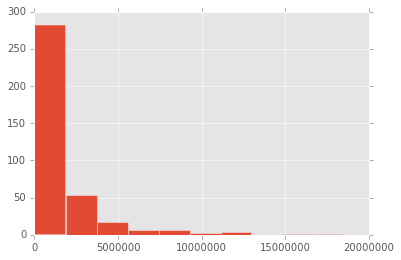

In [214]:
plt.hist(station_totals)
plt.ticklabel_format(style='plain', axis='x')